## 1. Import the necessary libraries

In [236]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
from keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
import import_ipynb
from data_preprocessing_sa import remove_punctuation, remove_stopword, normalize_numbers, remove_repeated_words
from keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, LSTM, TimeDistributed,Input
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2 Data preprocessing

> Read File CSV

In [237]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [238]:
X_train,y_train = ReadData("../data/data_processed/trainprocessed.csv")
X_test,y_test=ReadData("../data/data_processed/testprocesssed.csv")

In [239]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(8898,)
y_train size (8898,)


> word separation

In [240]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [241]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', 'number', 'tình_trạng', 'pin', 'còn', 'number', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', 'number', 'tuy', 'chip', 'number', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivonumberc', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [242]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [243]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11338
Vector: [ 1.43464074e-01 -4.07620162e-01  2.23892257e-01  2.14992315e-01
  1.19460477e-02 -2.40691528e-01  1.30492032e-01 -3.47662345e-02
 -1.59763142e-01  3.44812483e-01  9.89749841e-03 -2.64245421e-02
  2.03402936e-02 -1.45406261e-01  1.80796579e-01  2.30050161e-01
 -3.03430289e-01  1.25688329e-01 -1.59273833e-01  1.21959843e-01
  2.91214824e-01  5.60994089e-01  6.52180463e-02 -3.78501415e-01
 -3.00253242e-01  2.63441861e-01 -1.82305798e-01  1.61242381e-01
 -6.33263215e-03 -1.52246982e-01  2.68682390e-01 -3.36131603e-01
  1.51676536e-01  4.22021389e-01 -2.40061983e-01 -4.09748219e-02
  1.23036347e-01 -1.22372717e-01 -2.54468154e-03 -8.11603218e-02
 -5.24087586e-02  4.20224458e-01  1.10033620e-02 -2.54071116e-01
  4.83838171e-01  1.95056915e-01  5.66799715e-02  1.49235250e-02
  3.22803296e-02  2.23377675e-01  9.61141586e-02  3.11624467e-01
  2.00071216e-01  6.35255277e-02 -2.42416769e-01  1.20936662e-01
  3.32872957e-01 -1.61552150e-02  1.34527609e-02 -1.1297722

> Get a list of vector representations of words

In [244]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[89.12803    7.4923954]
 [87.112595  10.804442 ]]


> Visualize the context and semantic correlation of words

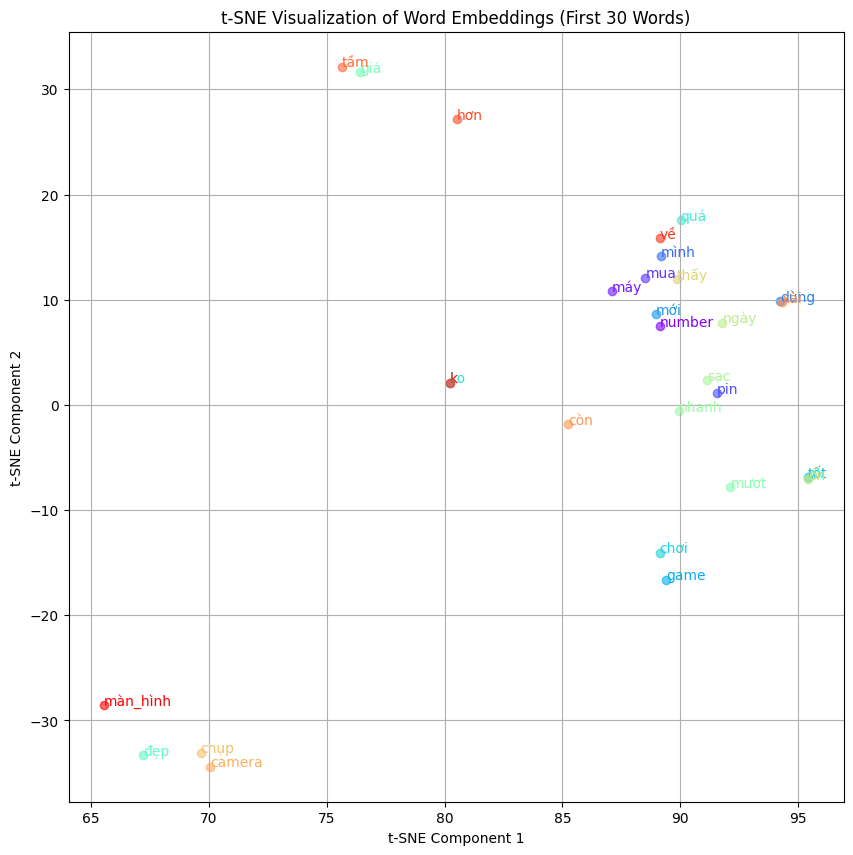

In [245]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [246]:
corpus=model_embedding.key_to_index

> Check to see how many words the longest sentence has

In [247]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

128
131


> convert words to vector space and padding

In [248]:
def comment_embedding(comment):
    matrix = np.zeros((131, 128))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [249]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 6064.07it/s]


> Convert labels to numbers

In [250]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


> Convert label to one_hot_vector

In [251]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [252]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 450
dropout_rate = 0.3
embedding_size=128
num_lstm_unit=24
pool_size=(2, 1)
strides=(2, 1)

> transform input properties

In [253]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [254]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Input(shape=(131, embedding_size, 1)))
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
name='convolution_layer'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size,strides,name='max_pooling'))
model.add(TimeDistributed(Flatten()))
model.add(Dropout(dropout_rate,name='dropout_layer1'))
model.add(LSTM(num_lstm_unit, return_sequences=True,name='LSTM_layer1'))
model.add(Dropout(dropout_rate,name='dropout_layer2'))
model.add(LSTM(num_lstm_unit,name='LSTM_layer2'))
model.add(Dense(3, activation='softmax'))

### 3.3. Hyperparameter

In [255]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [256]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=15,          
    restore_best_weights=True  
)

In [257]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    callbacks=[early_stopping_callback] 
)

Epoch 1/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.4948 - loss: 0.9605
Epoch 2/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - accuracy: 0.5162 - loss: 0.9401
Epoch 3/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.5175 - loss: 0.9487
Epoch 4/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - accuracy: 0.5149 - loss: 0.9519
Epoch 5/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - accuracy: 0.5105 - loss: 0.9522
Epoch 6/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - accuracy: 0.5217 - loss: 0.9391
Epoch 7/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.5136 - loss: 0.9514
Epoch 8/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.5215 - loss: 0.9392
Epoch 9/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.5170 - loss: 0.9466
Epoch 10/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.5159 - loss: 0.9464
Epoch 11/450
279/279 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.5166 - loss: 0.9433
Epoch 12/450
279/27

>Network Architecture

In [258]:
print(model.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 129, 1, 150)    │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 64, 150)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer1 (Dropout)        │ (None, 64, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer1 (LSTM)              │ (None, 64, 24)         │        16,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer2 (Dropout)        │ (None, 64, 24)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_layer2 (LSTM)              │ (None, 24)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,189 (934.34 KB)

 Trainable params: 79,629 (311.05 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 159,260 (622.11 KB)

None


> Network Architecture Diagram

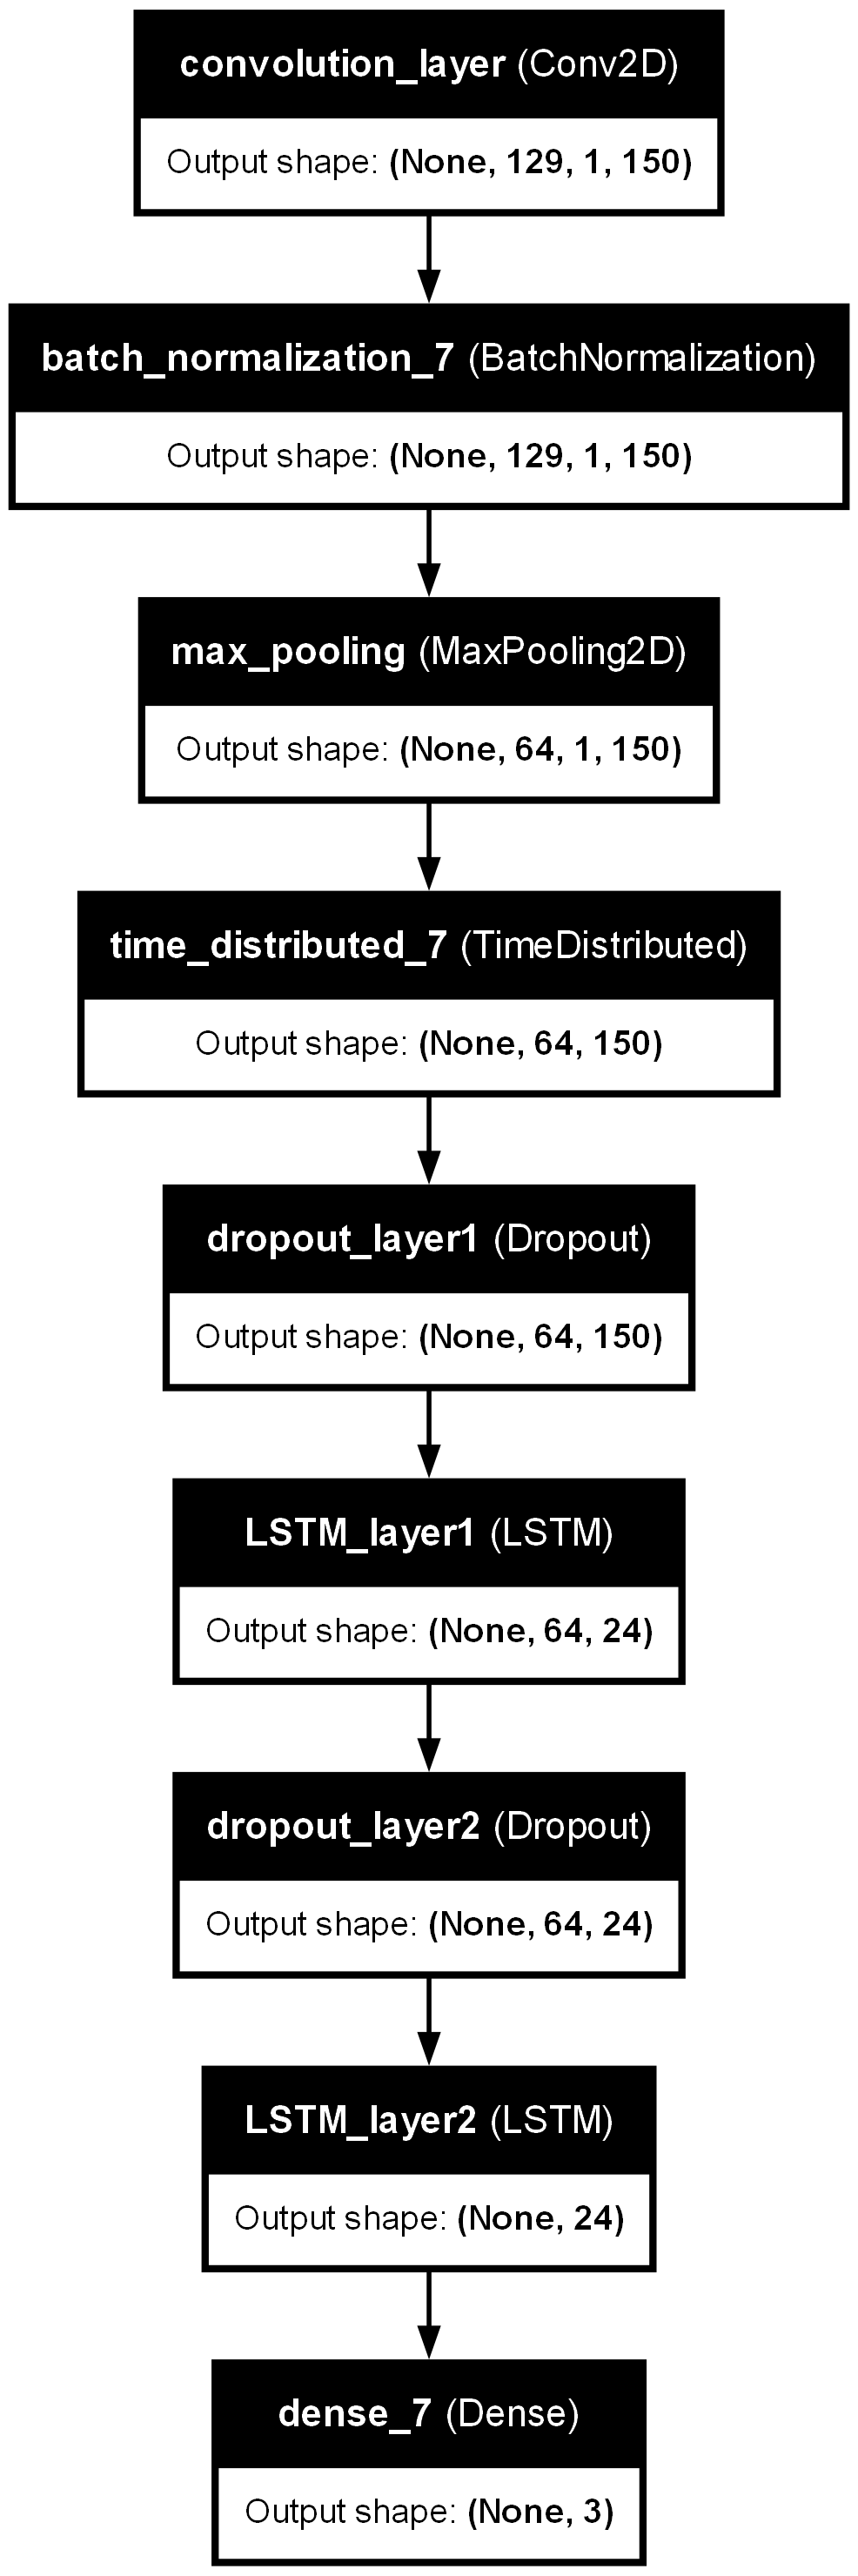

In [259]:
plot_model(model, to_file='../design/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [260]:
model.save('../model/model_hybrid_cnn_lstm_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [261]:
model_sentiment=load_model("../model/model_hybrid_cnn_lstm_sentiment.h5")

> predict  test dataset 

In [262]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step


> First 10 lines of comments

In [263]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 2 2 0 2 1 2 2 2 2]
['Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Neutral'
 'Positive' 'Positive' 'Positive' 'Positive']


> Data Preprocessing sample

In [264]:
def Preprocessing(comment):
    comment= remove_punctuation(comment.lower())
    comment= normalize_numbers(comment)
    comment= remove_stopword(comment)
    comment= ViTokenizer.tokenize(comment)
    comment= [remove_repeated_words(comment)]
    comment = wordseparation(comment)
    comment =np.expand_dims(comment_embedding(comment[0]),axis=0)
    return comment

> Predict one a new sample

In [265]:
comment = "Máy thiết kế quá đẹp ,dùng dk mấy hôm r thấy máy vẫn ổn ,tiếc là pin tụt quá nhanh ,pin sạc thì nhanh nóng 😌"
comment_preprocessed=Preprocessing(comment)
result_one = model_sentiment.predict(comment_preprocessed)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [266]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8206
Precision: 0.8101
Recall: 0.8206
F1-score: 0.8145677504903593
